<a href="https://colab.research.google.com/github/AnuragRoy485/Telecom-Customer-Churn-Project/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


In [40]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [41]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [43]:
df.shape

(7043, 21)

In [44]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


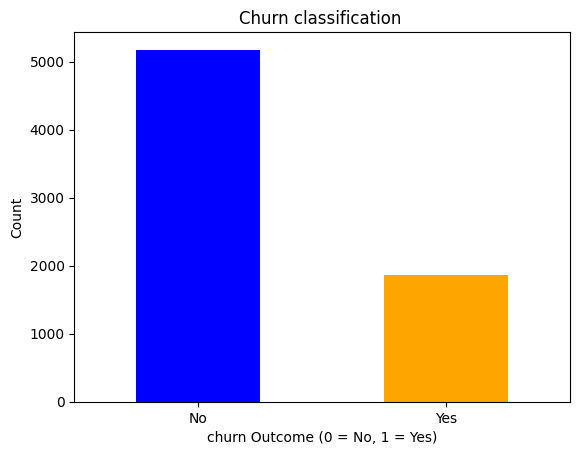

In [45]:
counts = df['Churn'].value_counts()

# Bar plot
counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("churn Outcome (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Churn classification ")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

In [46]:
df = df.copy()
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])

df = df.drop("customerID", axis=1)


In [47]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [48]:
print(y)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


In [49]:
print(X)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [51]:
print(X_train) , print(X_test) , print(y_train) , print(y_test)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
1413    Male              0     Yes        Yes      65          Yes   
7003    Male              0      No         No      26           No   
3355  Female              0     Yes         No      68          Yes   
4494    Male              0      No         No       3          Yes   
3541  Female              0     Yes         No      49           No   
...      ...            ...     ...        ...     ...          ...   
3451    Male              1     Yes         No      65          Yes   
5123  Female              1      No         No      15          Yes   
4135  Female              0     Yes        Yes      36          Yes   
4249  Female              0     Yes        Yes      10          Yes   
1505    Male              1      No         No       1          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
1413               Yes     Fiber optic            Yes          Yes   
7003  N

(None, None, None, None)

In [52]:
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical:", numerical)
print("Categorical:", categorical)

Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ]
)


In [54]:
model = Pipeline([
    ("preprocess", preprocessor),
("svc", SVC(kernel='rbf', probability=True, class_weight='balanced'))
])


In [55]:
param_grid = {
    "svc__C": [0.1, 1, 5, 10, 20],
    "svc__gamma": ["scale", "auto", 1, 0.1, 0.01, 0.001],
    "svc__kernel": ["rbf"]
}

# 4. Grid Search
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

best_model = grid.best_estimator_

from sklearn.calibration import CalibratedClassifierCV
svc_model = CalibratedClassifierCV(best_model, cv=3)
svc_model.fit(X_train, y_train)


Best Score: 0.7704888888888889
Best Params: {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}


CalibratedClassifierCV(cv=3,
                       estimator=Pipeline(steps=[('preprocess',
                                                  ColumnTransformer(transformers=[('num',
                                                                                   StandardScaler(),
                                                                                   ['SeniorCitizen',
                                                                                    'tenure',
                                                                                    'MonthlyCharges',
                                                                                    'TotalCharges']),
                                                                                  ('cat',
                                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                                   ['gender',
                                                                                    'Partner',
                                                                                    'Dependents',
                                                                                    'PhoneService',
                                                                                    'MultipleLines',
                                                                                    'InternetService',
                                                                                    'OnlineSecurity',
                                                                                    'OnlineBackup',
                                                                                    'DeviceProtection',
                                                                                    'TechSupport',
                                                                                    'StreamingTV',
                                                                                    'StreamingMovies',
                                                                                    'Contract',
                                                                                    'PaperlessBilling',
                                                                                    'PaymentMethod'])])),
                                                 ('svc',
                                                  SVC(C=0.1,
                                                      class_weight='balanced',
                                                      gamma=1,
                                                      probability=True))]))

In [57]:
# Predict on test data
y_pred = svc_model.predict(X_test)

# Accuracy
print("\nFinal Accuracy:", accuracy_score(y_test, y_pred))



Final Accuracy: 0.757640369580668


In [58]:
import joblib

joblib.dump(svc_model, "svc_model.pkl")

print("Model saved as svc_model.pkl")


Model saved as svc_model.pkl
